<a href="https://colab.research.google.com/github/rociotarda/TP1---Datos/blob/main/AnalisisExploratorioRocio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
pip install squarify

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import io
import squarify
from scipy.stats import gaussian_kde

In [ ]:
df_train_labels = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))
df_train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [ ]:
df_train_values = pd.read_csv(io.BytesIO(uploaded['train_values.csv']))
df_train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Mergeo ambas tablas
train_values_with_train_labels = df_train_labels.merge(df_train_values, on='building_id', how='inner')
train_values_with_train_labels

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Geo level 1 grafico proporcional de buildings por 'provincia'

geo_level_1 = train_values_with_train_labels.groupby('geo_level_1_id').agg({'building_id':'count'})
geo_level_1.reset_index(inplace=True)
col_rename1 = {'building_id':'amount_of_buildings'}
geo_level_1 = geo_level_1.rename(columns= col_rename1)

buldings_per_geo_level_1 = train_values_with_train_labels['geo_level_1_id'].value_counts()
buldings_per_geo_level_1.to_list()
buildings = geo_level_1['amount_of_buildings'].value_counts().index

In [ ]:
labels = [f'{geo_level_1_id} Geo level 1 ID\n Amount of buildings {amount_of_buildings}' for amount_of_buildings, geo_level_1_id in zip(geo_level_1.amount_of_buildings, geo_level_1.geo_level_1_id)]

plt.figure(figsize=(15, 10))
plt.rc('font', size=12)
squarify.plot(sizes=buldings_per_geo_level_1, label=labels[:10], alpha=0.6, text_kwargs={'fontsize':10})

plt.title("Amount of buildings per geo level 1",fontsize=23)
plt.axis('off')
plt.show()

In [ ]:
# Daño por geo level 1

# Ver que los que no tienen mas del 10% del maximo de cantidad, no me parece que haya que tenerlos en cuenta

damage_per_geo_level1 =  train_values_with_train_labels.groupby('geo_level_1_id').agg({'damage_grade': ['mean','count']})
damage_per_geo_level1.columns = damage_per_geo_level1.columns.get_level_values(0) + '_' + damage_per_geo_level1.columns.get_level_values(1)
damage_per_geo_level1.reset_index(inplace=True)
damage_geo_level1 = damage_per_geo_level1.sort_values('damage_grade_mean',ascending=False)
damage_per_geo_level1.sort_values('damage_grade_count',ascending=False)
top_5_damage_per_geo_level1 = damage_per_geo_level1.nlargest(5,'damage_grade_mean').sort_values('damage_grade_mean',ascending=False)

In [ ]:
damage_geo_level1.head()

,geo_level_1_id,damage_grade_mean,damage_grade_count
17,17,2.794480,21813
18,18,2.708373,3189
21,21,2.563369,14889
8,8,2.485273,19080
27,27,2.446457,12532


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

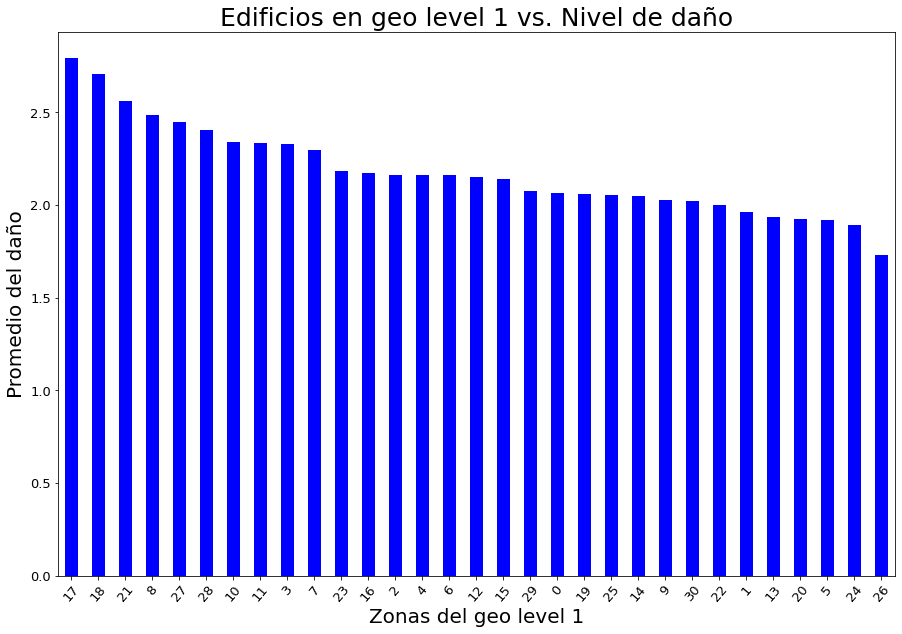

In [ ]:
damage_geo_level1['damage_grade_mean'].plot.bar(stacked=True, figsize=(15,10), color=['blue'])

plt.title("Edificios en geo level 1 vs. Nivel de daño", size = 25)
plt.xlabel("Zonas del geo level 1", size=20)
plt.ylabel("Promedio del daño", size=20)
plt.yticks(size = 13)
plt.xticks(rotation=50, size = 13)

In [ ]:
top_5_damage_per_geo_level1

,geo_level_1_id,damage_grade_mean,damage_grade_count
17,17,2.794480,21813
18,18,2.708373,3189
21,21,2.563369,14889
8,8,2.485273,19080
27,27,2.446457,12532


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

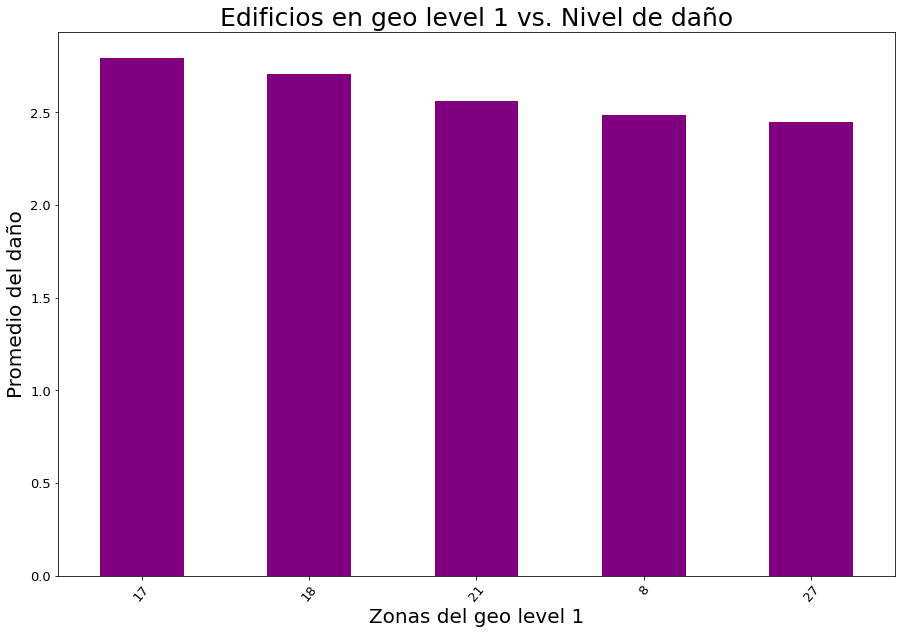

In [ ]:
top_5_damage_per_geo_level1['damage_grade_mean'].plot.bar(stacked=True, figsize=(15,10), color=['purple'])

plt.title("Edificios en geo level 1 vs. Nivel de daño", size = 25)
plt.xlabel("Zonas del geo level 1", size=20)
plt.ylabel("Promedio del daño", size=20)
plt.yticks(size = 13)
plt.xticks(rotation=50, size = 13)

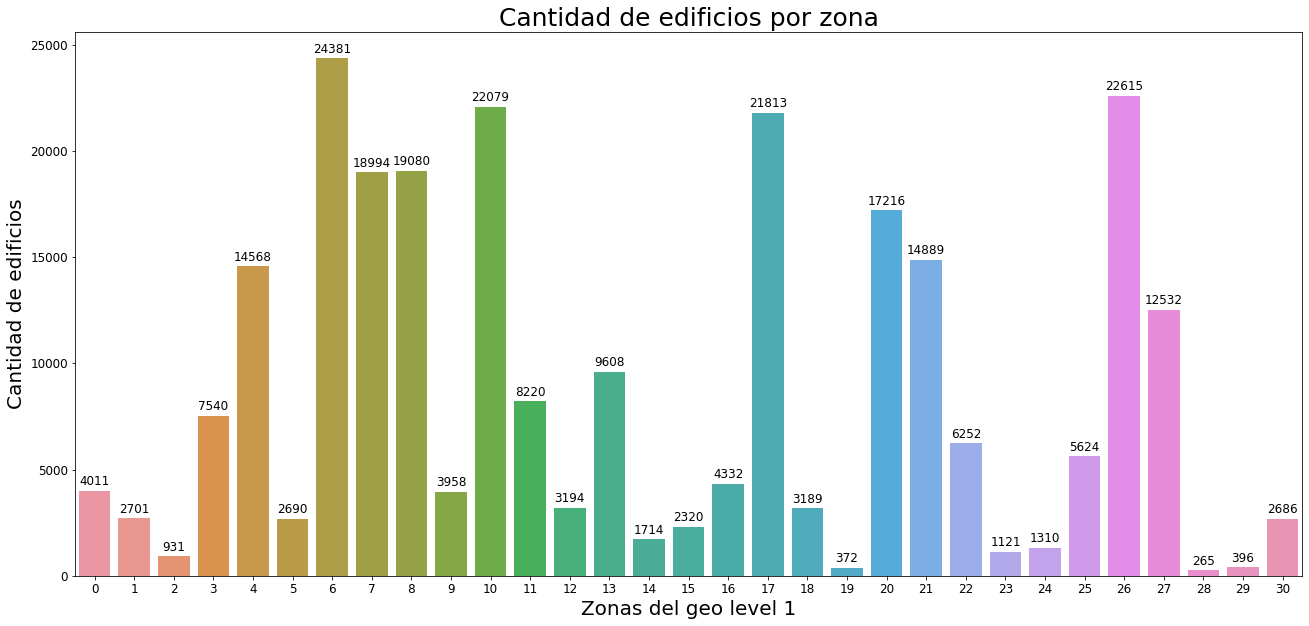

In [ ]:
target = train_values_with_train_labels['geo_level_1_id'].value_counts()
plt.subplots(figsize=(22,10))
grafico=sns.barplot(y=target.values,x=target.index,orient='v')
for p in grafico.patches:
    grafico.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
grafico.set_title("Cantidad de edificios por zona",fontsize=25)
grafico.set_ylabel("Cantidad de edificios",fontsize=20)
grafico.set_xlabel("Zonas del geo level 1",fontsize=20);

In [ ]:
# NO LO VOY A USAR
top_5_per_geo_level1 = top_10_damage_per_geo_level1.nlargest(5,'damage_grade_count').sort_values('damage_grade_mean',ascending=False)
zones_geo_level_dos = train_values_with_train_labels.groupby(['geo_level_1_id','geo_level_2_id']).agg({'damage_grade': ['mean','count']})
zones_geo_level_dos.columns = zones_geo_level_dos.columns.get_level_values(0) + '_' + zones_geo_level_dos.columns.get_level_values(1)
zones_geo_level_dos.reset_index(inplace=True)
top_5_zones_geo_level = zones_geo_level_dos[zones_geo_level_dos['geo_level_1_id'].isin(top_5_per_geo_level1['geo_level_1_id'])]
top_5_zones_geo_level.sort_values(['geo_level_1_id', 'geo_level_2_id', 'damage_grade_mean'],ascending=False)
top_5_zones_geo_level

,geo_level_1_id,geo_level_2_id,damage_grade_mean,damage_grade_count
281,6,8,2.166667,120
282,6,37,2.320000,125
283,6,48,2.479839,248
284,6,54,2.162393,117
285,6,94,2.556962,79
...,...,...,...,...
1300,26,1216,1.966292,356
1301,26,1222,2.120370,324
1302,26,1259,1.634069,317
1303,26,1377,1.752650,283


In [ ]:
# NO LO VOY A USAR
top_5_zones_geo_level_pivot = top_5_zones_geo_level.pivot_table(index='geo_level_1_id',columns='geo_level_2_id', values='damage_grade_mean',aggfunc=np.mean)
top_5_zones_geo_level_pivot

geo_level_2_id,1,8,21,31,36,37,39,41,48,51,54,66,70,74,76,80,83,87,88,90,94,95,96,98,99,104,105,109,110,127,138,139,141,142,145,151,156,172,178,187,...,1241,1248,1250,1253,1255,1259,1269,1275,1277,1278,1279,1280,1287,1289,1291,1297,1308,1313,1322,1324,1327,1332,1343,1350,1352,1357,1373,1377,1381,1382,1384,1385,1393,1397,1401,1403,1407,1414,1415,1425
geo_level_1_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,NaN,2.166667,NaN,NaN,NaN,2.32,NaN,NaN,2.479839,NaN,2.162393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.556962,NaN,2.536364,NaN,2.192308,2.562092,NaN,2.017857,NaN,NaN,NaN,2.280702,2.180851,NaN,NaN,NaN,NaN,NaN,NaN,2.290598,...,2.455752,NaN,NaN,1.518349,2.10274,NaN,2.153846,NaN,2.591743,NaN,NaN,2.142857,2.675258,2.350446,2.184211,NaN,NaN,NaN,NaN,2.402878,NaN,2.267442,NaN,2.102174,NaN,NaN,NaN,NaN,NaN,NaN,2.265432,2.051402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.348039,NaN,NaN,NaN,NaN,NaN,NaN,2.949239,NaN,NaN,NaN,2.317568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.823276,NaN,2.55618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.686131,NaN,NaN,2.71831,2.391089,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.695341,NaN,NaN,NaN,NaN,NaN,NaN,2.37931,NaN,NaN,NaN,2.427873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60452,NaN,2.391919,2.63311,2.699571
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.970976,NaN,2.171429,NaN,2.385827,2.560799,2.775148,2.353846,NaN,NaN,NaN,NaN,NaN,NaN,2.9202,NaN,NaN,2.073497,2.785156,NaN,NaN,2.865591,NaN,1.908917,NaN,NaN,NaN,NaN,...,NaN,2.367521,2.33908,NaN,NaN,NaN,NaN,NaN,NaN,2.13079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.310624,NaN,NaN,NaN,2.273556,NaN,NaN,2.337176,NaN,NaN,NaN
17,NaN,NaN,2.650568,2.706977,NaN,NaN,NaN,NaN,NaN,2.894895,NaN,NaN,NaN,NaN,NaN,2.891192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.951613,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.816479,NaN,NaN,2.612717,NaN,NaN,NaN,NaN,NaN,2.678218,2.965385,2.647368,NaN,2.632353,NaN,NaN,NaN,2.946524,2.3367,NaN,NaN,2.941634,NaN,NaN,NaN,2.723735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,1.433918,NaN,1.532194,NaN,NaN,NaN,NaN,NaN,NaN,2.045732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.004651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.634069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75265,NaN,NaN,NaN,NaN,NaN,NaN,1.649106,NaN,NaN,NaN,NaN,NaN


In [ ]:
plot_surface = top_5_zones_geo_level_pivot.plot.bar(stacked=False, figsize=(15,10), color=["m", "c", 'blue'])
plot_surface.set_title("Condición del suelo vs grado de daño", fontsize=18)
plot_surface.set_ylabel("Cantidad de edificios", fontsize=18);
plot_surface.set_xlabel("Condición del suelo", fontsize=18);

In [ ]:
#Me fijo el material de las edificaciones que son unicas en el geo level 3
unique_buildings_in_geo_level_3 = damage_per_geo_level3[damage_per_geo_level3['damage_grade_count']== 1]
unique_buildings_in_geo_level_3.sort_values('damage_grade_mean',ascending=False)

,geo_level_3_id,damage_grade_mean,damage_grade_count
5675,6139,3.0,1
5078,5496,3.0,1
5031,5445,3.0,1
4958,5364,3.0,1
9348,10129,3.0,1
...,...,...,...
7333,7936,1.0,1
430,461,1.0,1
4198,4542,1.0,1
9553,10348,1.0,1


In [ ]:
train_values_with_train_labels

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
col_rename1 = {'has_superstructure_adobe_mud':'adobe_barro','has_superstructure_mud_mortar_stone':'adobe_piedra','has_superstructure_stone_flag':'piedra',\
              'has_superstructure_cement_mortar_stone':'cemento_piedra','has_superstructure_mud_mortar_brick':'barro_ladrillos','has_superstructure_cement_mortar_brick':'madera_para_construccion',\
              'has_superstructure_timber':'madera_para_construccion','has_superstructure_bamboo':'bambu','has_superstructure_rc_non_engineered':'concreto_reforzado_no_diseñado','has_superstructure_rc_engineered':'concreto_reforzado_diseñado',\
              'has_superstructure_other':'otro'}
materials = (train_values_with_train_labels.rename(columns= col_rename1).iloc[:,16:27])
materials_vs_damage_mean = materials.apply(lambda x: np.asarray(x) * np.asarray(train_values_with_train_labels['damage_grade']))\
                              .apply(lambda x: x.replace(0, np.NaN))\
                              .apply(lambda x: np.asarray(x.dropna()).mean())

col_rename2 = {0:'damage_grade'}
materials_vs_damage_mean_df = materials_vs_damage_mean.to_frame().rename(columns= col_rename2)
materials_vs_damage_mean_df = materials_vs_damage_mean_df.sort_values('damage_grade',ascending=False)
materials_vs_damage_mean_df

,damage_grade
piedra,2.452554
adobe_barro,2.346782
adobe_piedra,2.337901
barro_ladrillos,2.271212
madera_para_construccion,2.165222
bambu,2.111718
otro,2.088348
cemento_piedra,1.967593
concreto_reforzado_no_diseñado,1.779530
madera_para_construccion,1.693296


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

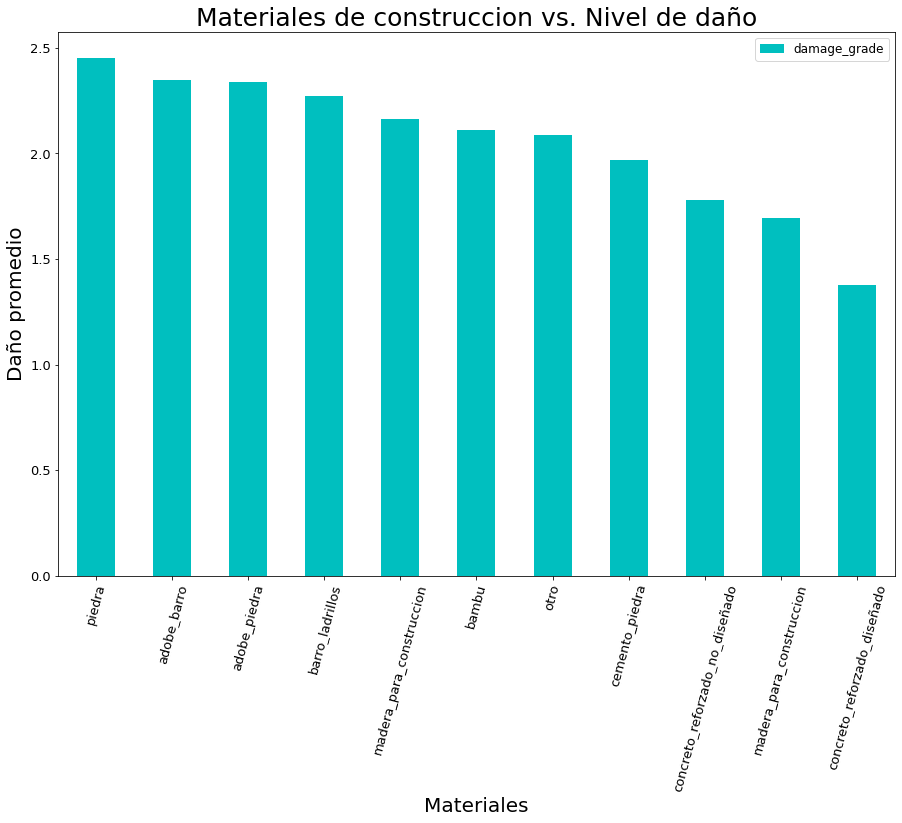

In [ ]:

materials_vs_damage_mean_df.plot.bar(stacked=True, figsize=(15,10), color=['c'])

plt.title("Materiales de construccion vs. Nivel de daño", size = 25)
plt.xlabel("Materiales", size=20)
plt.ylabel("Daño promedio", size=20)
plt.yticks(size = 13)
plt.xticks(rotation=75, size = 13)

In [ ]:
#Visualizacion

#plot=materials_vs_damage_mean_df.index.value_counts().sort_values(ascending=True).plot(kind='bar',color=['pink'], figsize=(20,10))
#plt.xlabel("Materials", size=15)
#plt.ylabel("Average damage", size=15)
#plt.legend(fancybox=True)
#plt.xticks(rotation=0)
#plt.title("Building materials vs. Damage", size = 30)
#leyenda=plt.legend(['damage_grade'],frameon=True,facecolor='white',edgecolor='black')



#x1 = materials_vs_damage_mean_df.index
#y1 = materials_vs_damage_mean_df['damage_grade']

#plt.bar(x1, y1, label="Average damage ", color='pink')
#plt.plot()

#plt.xlabel("Materials", size=15)
#plt.xticks(rotation=75)
#plt.ylabel("Average damage", size=15)
#plt.title("Building materials vs. Damage", size = 20)
#plt.legend(fancybox=True)
#plt.show()

In [ ]:
col_rename1 = {'has_superstructure_adobe_mud':'adobe_barro','has_superstructure_mud_mortar_stone':'adobe_piedra','has_superstructure_stone_flag':'piedra',\
              'has_superstructure_cement_mortar_stone':'cemento_piedra','has_superstructure_mud_mortar_brick':'barro_ladrillos','has_superstructure_cement_mortar_brick':'madera_para_construccion',\
              'has_superstructure_timber':'madera_para_construccion','has_superstructure_bamboo':'bambu','has_superstructure_rc_non_engineered':'concreto_reforzado_no_diseñado','has_superstructure_rc_engineered':'concreto_reforzado_diseñado',\
              'has_superstructure_other':'otro'}
#materials = (train_values_with_train_labels.rename(columns= col_rename1).iloc[:,16:27])
materials_and_age_mean = materials.apply(lambda x: np.asarray(x) * np.asarray(train_values_with_train_labels['age']))\
                              .apply(lambda x: x.replace(0, np.NaN))\
                              .apply(lambda x: np.asarray(x.dropna()).mean())

col_rename2 = {0:'age_buildings'}
materials_and_age_mean_df = materials_and_age_mean.to_frame().rename(columns= col_rename2)
materials_and_age_mean_df = materials_and_age_mean_df.sort_values('age_buildings',ascending=False)
materials_and_age_mean_df


,age_buildings
barro_ladrillos,49.528455
adobe_barro,43.917139
piedra,33.153780
madera_para_construccion,30.362911
otro,29.750297
adobe_piedra,28.801067
bambu,27.998144
cemento_piedra,24.101751
concreto_reforzado_no_diseñado,22.731594
madera_para_construccion,22.380840


In [ ]:
materials_age_damage_grade = materials_and_age_mean_df.merge(materials_vs_damage_mean_df ,on=materials_vs_damage_mean_df.index,how='inner')
materials_age_damage_grade = materials_age_damage_grade.set_index('key_0')
materials_age_damage_grade

,age_buildings,damage_grade
key_0,,
piedra,49.528455,2.452554
adobe_barro,43.917139,2.346782
adobe_piedra,33.153780,2.337901
barro_ladrillos,30.362911,2.271212
madera_para_construccion,29.750297,2.165222
madera_para_construccion,29.750297,1.693296
madera_para_construccion,22.380840,2.165222
madera_para_construccion,22.380840,1.693296
bambu,28.801067,2.111718


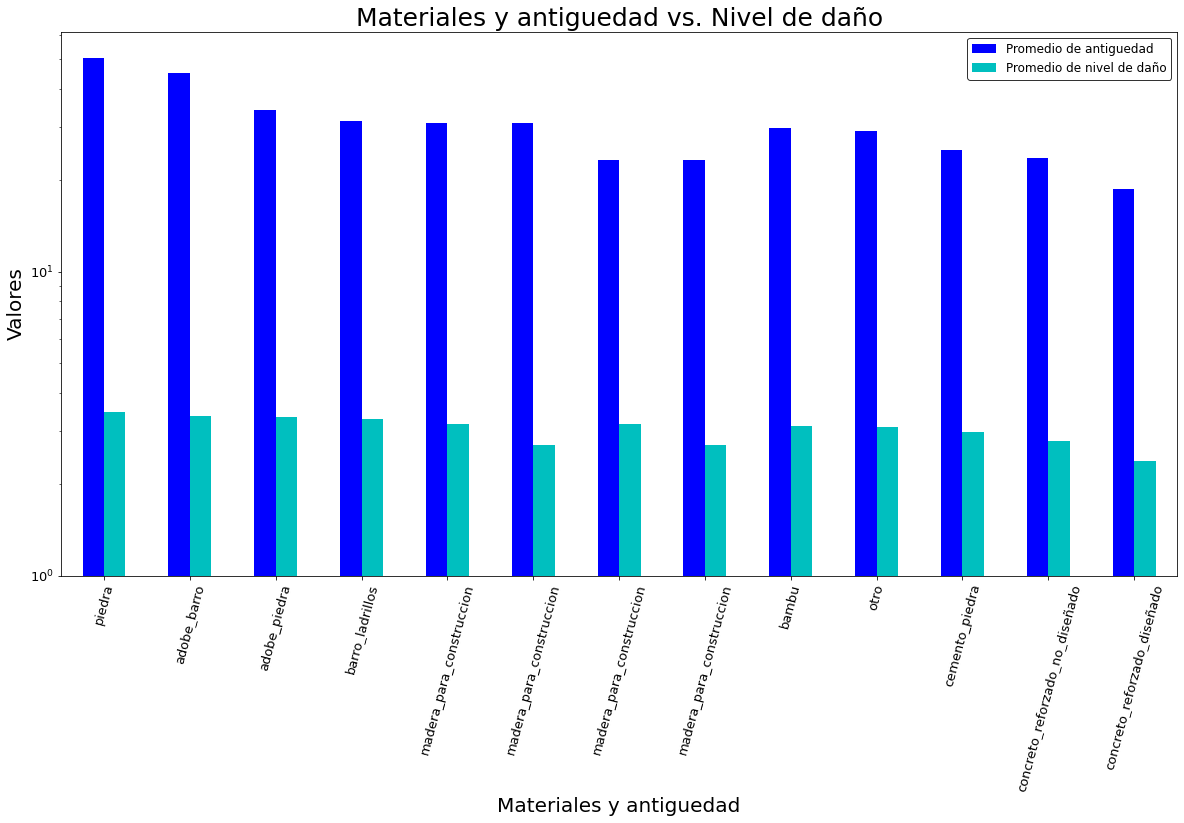

In [ ]:
grafico=materials_age_damage_grade.plot(kind='bar',color=['blue','c'],log=True, figsize=(20,10))
plt.title("Materiales y antiguedad vs. Nivel de daño", size = 25)
plt.xlabel("Materiales y antiguedad", size=20)
plt.ylabel("Valores", size=20)
plt.yticks(size = 13)
plt.xticks(rotation=75, size = 13)
leyenda=plt.legend(['Promedio de antiguedad','Promedio de nivel de daño'],frameon=True,facecolor='white',edgecolor='black')

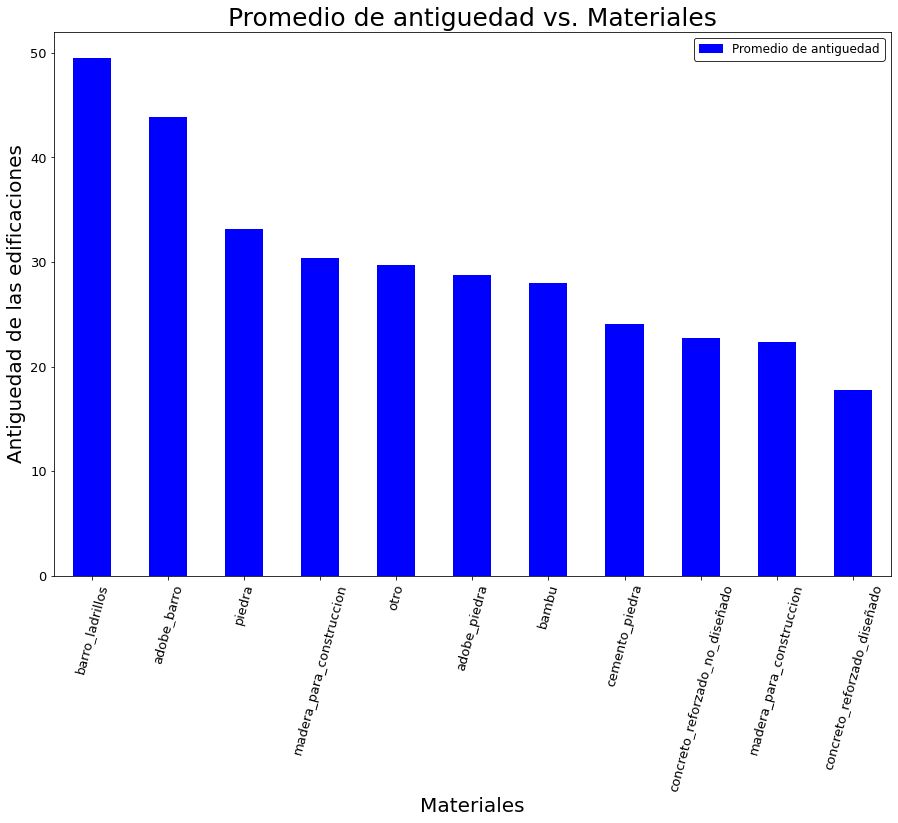

In [ ]:
grafico=materials_and_age_mean_df.plot(kind='bar',color='blue', figsize=(15,10))
plt.title("Promedio de antiguedad vs. Materiales", size = 25)
plt.xlabel("Materiales", size=20)
plt.xticks(rotation=75, size = 13)
plt.ylabel("Antiguedad de las edificaciones", size=20)
plt.yticks(size = 13)
leyenda=plt.legend(['Promedio de antiguedad'],frameon=True,facecolor='white',edgecolor='black')